## Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git
!pip install geopandas
!pip install pygeos
!pip install rtree

In [ ]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [ ]:
!wget https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

In [ ]:
!unzip /content/gadm36_PHL_shp.zip -d /content/gadm36_PHL_shp

In [5]:
# Read shapefile
ph = gpd.read_file('/content/gadm36_PHL_shp')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [ ]:
!wget https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [ ]:
# Read GeoJSON file
healthsites = gpd.read_file('/content/philippines.geojson', driver='GeoJSON')
healthsites.head(100)

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

In [75]:
ncr = gpd.sjoin(healthsites, ph[ph.NAME_1=="Metropolitan Manila"], op='within')
bulacan = gpd.sjoin(healthsites, ph[ph.NAME_1=="Bulacan"], op='within')
amenities = ["clinic", "dentist", "doctors", "hospital", "pharmacy", "social_facility", ""]

In [76]:
def plotProvinces():
    ph[ph.NAME_1=="Metropolitan Manila"].plot(ax=ax, color='white', edgecolor='dimgray')
    ph[ph.NAME_1=="Bulacan"].plot(ax=ax, color='white', edgecolor='dimgray')

def plotAmenities(amenity):
    ncr[ncr.amenity==amenity].plot(ax=ax, column="amenity", alpha=0.35, cmap="BrBG_r")
    bulacan[bulacan.amenity==amenity].plot(ax=ax, column="amenity", alpha=0.35, cmap="YlOrRd_r")

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


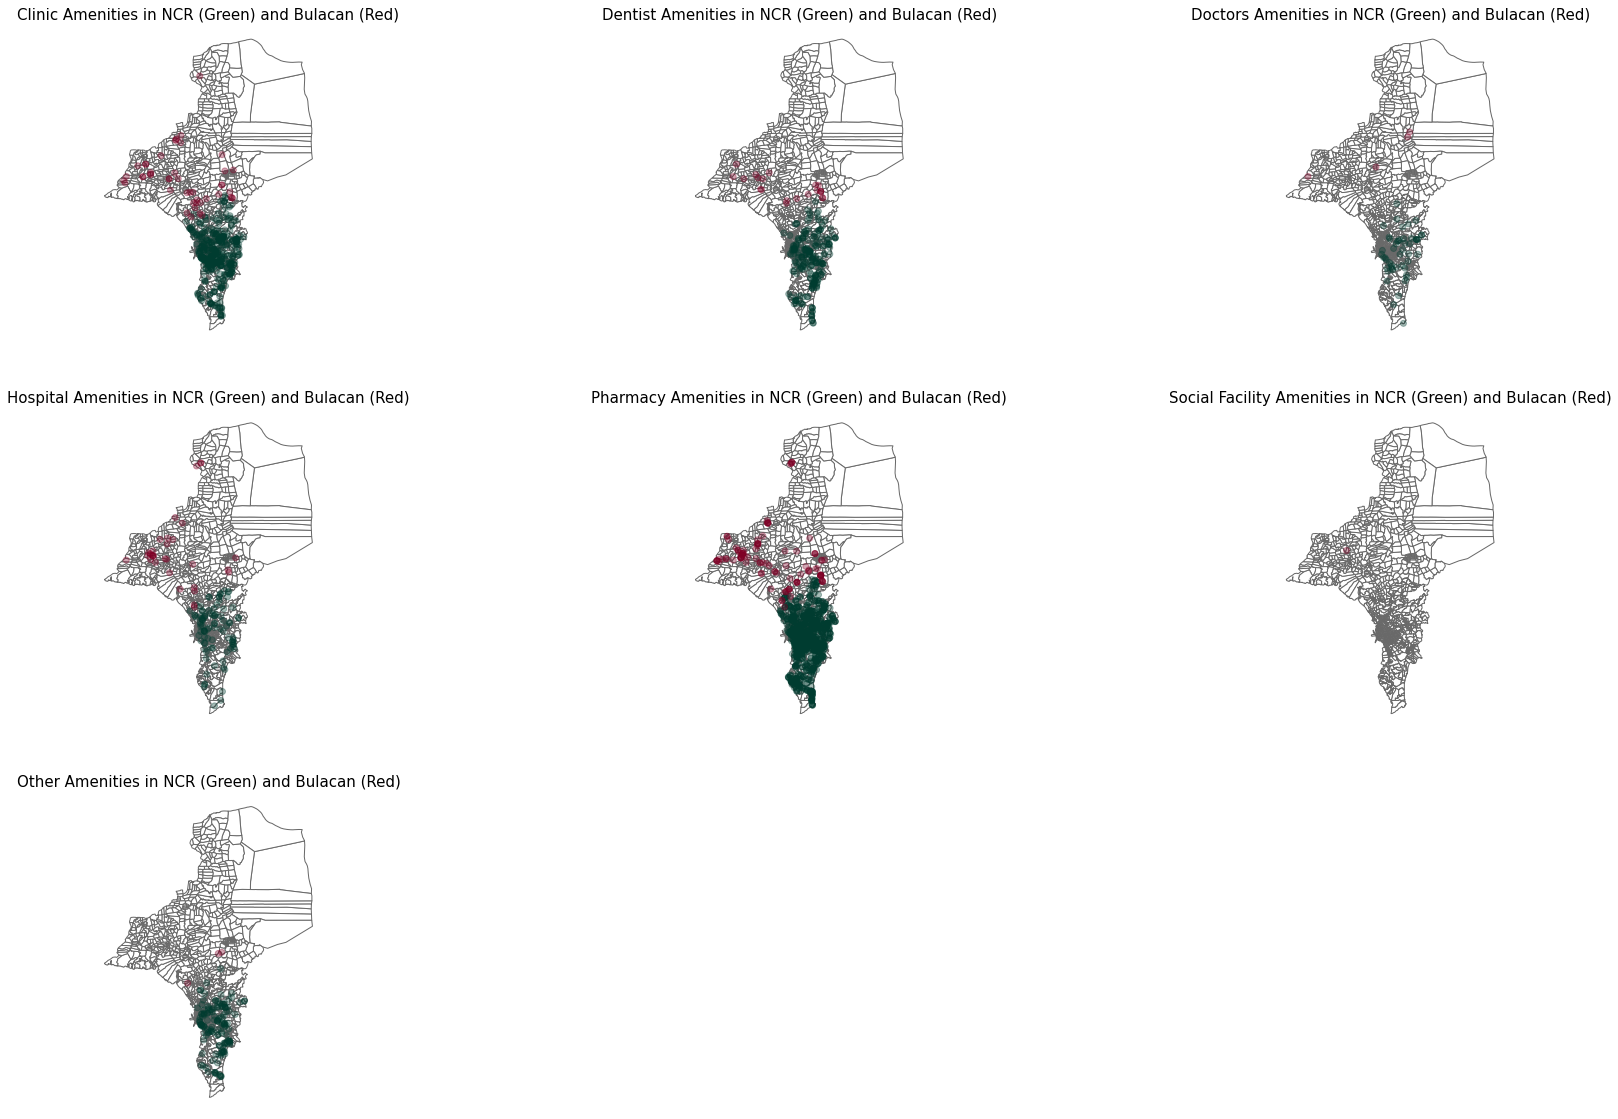

In [80]:
fig = plt.figure(figsize=(30, 20))
plotNum = 1

for amenity in amenities:
  ax = fig.add_subplot(3, 3, plotNum)
  plotProvinces()
  plotAmenities(amenity)
  if amenity == "":
    ax.set_title("Other Amenities in NCR (Green) and Bulacan (Red)", fontsize=15)
  elif amenity == "social_facility":
    ax.set_title("Social Facility Amenities in NCR (Green) and Bulacan (Red)", fontsize=15)
  else:
    ax.set_title(amenity.capitalize() + " Amenities in NCR (Green) and Bulacan (Red)", fontsize=15)
  ax.axis('off');
  plotNum = plotNum + 1